**Import Packages**

In [ ]:
#Import packages
import pickle
import re
import string
import unicodedata
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install gensim

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/615_dataset(FI).csv')
print(df)

                                                     X  Y
0               বকেয়া ঋণে সুদ বাড়বে না পাট ব্যবসায়ীদের  1
1                গতবারের চেয়ে বেশি ধান-চাল কিনবে সরকার  1
2             দুস্থ ও ছিন্নমূল মানুষের পাশে সাংবাদিকরা  1
3            ঋণ গ্রহীতাদের সুবিধা দিল কেন্দ্রীয় ব্যাংক  1
4        সচল হলো কেন্দ্রীয় ব্যাংকের অটোমেটেড ক্লিয়ারিং  1
..                                                 ... ..
610             সরগরম সিরাজগঞ্জের সবজির আড়ত, কমেছে দাম  2
611  সিন্ডিকেট কারসাজিতে অস্থির খাতুনগঞ্জের ভোজ্যতে...  2
612  ইচ্ছেমতো পণ্যের দাম নিচ্ছেন কারওয়ান বাজারের ব্...  2
613  কেয়া গ্রুপের বিরুদ্ধে কঠোর অবস্থানে পূবালী ব্য...  2
614              ডিএসইতে সপ্তাহশেষে বেড়েছে লেনদেন-সূচক  2

[615 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       615 non-null    object
 1   Y       615 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.7+ KB


In [ ]:
df.describe()

,Y
count,615.000000
mean,1.430894
std,0.495604
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


**Check Missing Values**

In [ ]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
features_with_na

[]

**Split Y(label)**

In [ ]:
y = df.iloc[:,1]
y.head()
#print(y)
print(y.shape)

(615,)


In [ ]:
df.groupby('Y').size()

Y
1    350
2    265
dtype: int64

**Labels Bar Charts**

Text(0, 0.5, 'number of label')

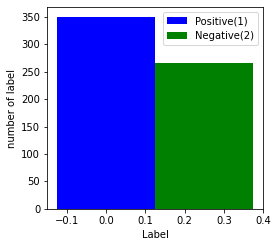

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[350], [265],]
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.7])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Positive(1)', 'Negative(2)'])
plt.xlabel("Label")
plt.ylabel("number of label")

In [ ]:
dx=df.iloc[:,0]
print(dx)

0                 বকেয়া ঋণে সুদ বাড়বে না পাট ব্যবসায়ীদের
1                  গতবারের চেয়ে বেশি ধান-চাল কিনবে সরকার
2               দুস্থ ও ছিন্নমূল মানুষের পাশে সাংবাদিকরা
3              ঋণ গ্রহীতাদের সুবিধা দিল কেন্দ্রীয় ব্যাংক
4          সচল হলো কেন্দ্রীয় ব্যাংকের অটোমেটেড ক্লিয়ারিং
                             ...                        
610               সরগরম সিরাজগঞ্জের সবজির আড়ত, কমেছে দাম
611    সিন্ডিকেট কারসাজিতে অস্থির খাতুনগঞ্জের ভোজ্যতে...
612    ইচ্ছেমতো পণ্যের দাম নিচ্ছেন কারওয়ান বাজারের ব্...
613    কেয়া গ্রুপের বিরুদ্ধে কঠোর অবস্থানে পূবালী ব্য...
614                ডিএসইতে সপ্তাহশেষে বেড়েছে লেনদেন-সূচক
Name: X, Length: 615, dtype: object


In [ ]:
import wordcloud
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
%matplotlib inline

tokenizer = RegexpTokenizer(r'\w+')

x_text = '. '.join(df['X'])
x_words = tokenizer.tokenize(x_text)

x_sentences = x_text.replace(",", ".").replace("?", ".").split(".")
x_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in x_sentences]

Text(0, 0.5, 'proportion')

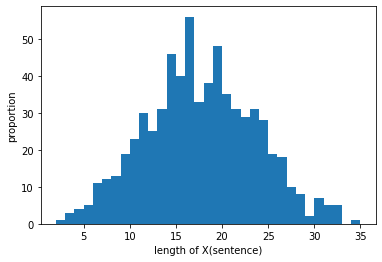

In [ ]:
x_sent_len = [i for i in x_sent_lenghs if i!=0]

plt.hist(x_sent_len, bins=range(min(x_sent_len), max(x_sent_len) + 1, 1))#,
              #alpha=0.4, color="blue", normed=True)
#labels = ["x"]
#plt.legend(labels)
#ax = fig.add_axes([0,0,0.3,0.5])
plt.xlabel("length of X(sentence)")
plt.ylabel("proportion")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'proportion')

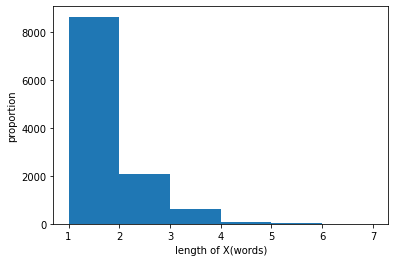

In [ ]:
x_word_len = [len(i) for i in x_words]

ax = plt.hist(x_word_len, bins=range(min(x_word_len), max(x_word_len) +1, 1))#,
              #alpha=0.5, color="blue", normed=True)
#labels = ["x"]
ax = fig.add_axes([0,0,0.3,0.5])
plt.xlabel("length of X(words)")
plt.ylabel("proportion")
#plt.legend(labels)
#plt.title("number of character per word distribution in x")

**Word Embedding**

In [ ]:
corpus_file = '/content/FI_corpus_New.txt'
sentences = []
with open(corpus_file, 'r', encoding="utf-8") as f:
    for line in f:
        sentences.append(line.split())

In [ ]:
print(len(sentences))
max_len = 0
count=0
for i in sentences:
  count=0
  for j in i:
    #print(j,end=' ')
    count +=1
  #print()
  if count > max_len:
    max_len = count
print(max_len)

4778
981


In [ ]:
from gensim.models import Word2Vec
word_model = Word2Vec(sentences, size=100, min_count=1, window=5, iter=10)
pretrained_weights = word_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)

Result embedding shape: (25560, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(word_model.wv.vocab)

{'গতবারের': <gensim.models.keyedvectors.Vocab object at 0x7f8c3afe4810>, 'চেয়ে': <gensim.models.keyedvectors.Vocab object at 0x7f8c3afe4990>, 'বেশি': <gensim.models.keyedvectors.Vocab object at 0x7f8c3afe4a50>, 'ধান-চাল': <gensim.models.keyedvectors.Vocab object at 0x7f8c3afe6290>, 'কিনবে': <gensim.models.keyedvectors.Vocab object at 0x7f8c3879d050>, 'সরকার': <gensim.models.keyedvectors.Vocab object at 0x7f8c387a1810>, 'দুস্থ': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfad0>, 'ও': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfa90>, 'ছিন্নমূল': <gensim.models.keyedvectors.Vocab object at 0x7f8c38cc0ed0>, 'মানুষের': <gensim.models.keyedvectors.Vocab object at 0x7f8c3879d090>, 'পাশে': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfb50>, 'সাংবাদিকরা': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfb90>, 'ঋণ': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfbd0>, 'গ্রহীতাদের': <gensim.models.keyedvectors.Vocab object at 0x7f8c387bfc10>, 'সুবিধা': 

In [ ]:
word_model.wv.most_similar_cosmul('সবচেয়ে')

[('আরেক', 0.9996857643127441),
 ('আইনের', 0.9996853470802307),
 ('মায়ের', 0.9996845722198486),
 ('তিনটি', 0.9996822476387024),
 ('পাবে', 0.9996796250343323),
 ('মাধ্যমে', 0.9996795058250427),
 ('দেওয়ার', 0.9996787905693054),
 ('সরকারের', 0.9996783137321472),
 ('করছে', 0.9996777772903442),
 ('আছে।', 0.9996767044067383)]

In [ ]:
def word2idx(word):
  return word_model.wv.vocab[word].index
def idx2word(idx):
  return word_model.wv.index2word[idx]

***Load X***

In [ ]:
corpus_file = '/content/X_New.txt'
sentences = []
with open(corpus_file, 'r', encoding="utf-8") as f:
    for line in f:
        sentences.append(line.split())
len(sentences)

615

In [ ]:
max_sentence_len = 12
#print('\nPreparing the data for LSTM...')
x = np.zeros([615, max_sentence_len], dtype=np.int32)
#y = np.zeros([800], dtype=np.int32)
for i, sentence in enumerate(sentences):
  for t, word in enumerate(sentence[:-1]):
      x[i, t] = word2idx(word)
  #y[i] = word2idx(sentence[-1])
print('train_x shape:', x.shape)
#print('train_y shape:', y.shape)

train_x shape: (615, 12)


**Split Dataset**

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print('train_x shape:', x_train.shape)
print('train_y shape:', y_train.shape)
print('test_x shape:', x_test.shape)
print('test_y shape:', y_test.shape)

train_x shape: (492, 12)
train_y shape: (492,)
test_x shape: (123, 12)
test_y shape: (123,)


**Classifier Algorithm**

**Train-Test Method For Naive Bayes**

**Test**

In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = GaussianNB().fit(x_train, y_train)
#model = MultinomialNB().fit(x_train, y_train)
# Predict Output
NBpred = model.predict(x_test)
#print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, NBpred))
cm1=confusion_matrix(y_test, NBpred)
print(confusion_matrix(y_test, NBpred))
print(classification_report(y_test, NBpred))
#SVC(random_state=0)
plot_confusion_matrix(model, x_test, y_test)  # doctest: +SKIP
plt.show()

**Train**

Train Accuracy ::  0.5650406504065041
[[267   3]
 [211  11]]
              precision    recall  f1-score   support

           1       0.56      0.99      0.71       270
           2       0.79      0.05      0.09       222

    accuracy                           0.57       492
   macro avg       0.67      0.52      0.40       492
weighted avg       0.66      0.57      0.43       492



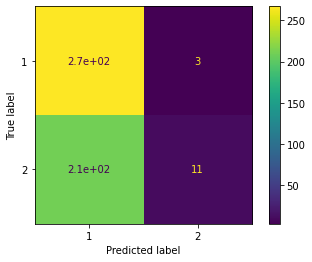

In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = GaussianNB().fit(x_train, y_train)
#model = MultinomialNB().fit(x_train, y_train)
# Predict Output
NBpred = model.predict(x_train)
print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
#print("Test Accuracy  :: ", accuracy_score(y_test, NBpred))
cm1=confusion_matrix(y_train, NBpred)
print(confusion_matrix(y_train, NBpred))
print(classification_report(y_train, NBpred))
#SVC(random_state=0)
plot_confusion_matrix(model, x_train, y_train)  # doctest: +SKIP
plt.show()

**K-Fold Method For NB**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()
#clf = naive_bayes.MultinomialNB()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, x, y, cv=5)
cm1=confusion_matrix(y, y_pred)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.56097561 0.57723577 0.48780488 0.56910569 0.56910569]
Accuracy: 0.55 (+/- 0.07)
[[302  48]
 [227  38]]
              precision    recall  f1-score   support

           1       0.57      0.86      0.69       350
           2       0.44      0.14      0.22       265

    accuracy                           0.55       615
   macro avg       0.51      0.50      0.45       615
weighted avg       0.52      0.55      0.48       615



**Train-Test Method For Decision Tree**

**Test**

Test Accuracy  ::  0.8292682926829268
[[66 14]
 [ 7 36]]
              precision    recall  f1-score   support

           1       0.90      0.82      0.86        80
           2       0.72      0.84      0.77        43

    accuracy                           0.83       123
   macro avg       0.81      0.83      0.82       123
weighted avg       0.84      0.83      0.83       123



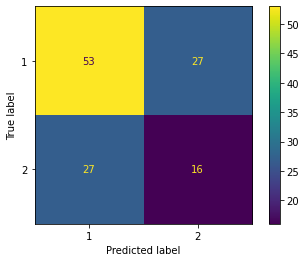

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
#print("Train Accuracy :: ", accuracy_score(y_train,classifier.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, y_pred))
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test)  # doctest: +SKIP
plt.show()

**Train Set Classification Report**

Train Accuracy ::  1.0
[[270   0]
 [  0 222]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       222

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



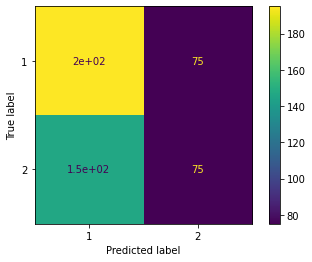

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)
print("Train Accuracy :: ", accuracy_score(y_train,classifier.predict(x_train)))
#print("Test Accuracy  :: ", accuracy_score(y_test, y_pred))
cm1=confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, x_train, y_train)  # doctest: +SKIP
plt.show()

**K-Fold Method For DTA**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, x, y, cv=5)
cm1=confusion_matrix(y, y_pred)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.69105691 0.84552846 0.82926829 0.85365854 0.67479675]
Accuracy: 0.78 (+/- 0.16)
[[284  66]
 [ 71 194]]
              precision    recall  f1-score   support

           1       0.80      0.81      0.81       350
           2       0.75      0.73      0.74       265

    accuracy                           0.78       615
   macro avg       0.77      0.77      0.77       615
weighted avg       0.78      0.78      0.78       615



**Train-Test Method For SVM**

**Test**

In [ ]:
#SVM Algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
SVM_pred = svclassifier.predict(x_test)
#print("Train Accuracy :: ", accuracy_score(y_train,svclassifier.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, SVM_pred))

Test Accuracy  ::  0.6178861788617886


[[68 12]
 [35  8]]
              precision    recall  f1-score   support

           1       0.66      0.85      0.74        80
           2       0.40      0.19      0.25        43

    accuracy                           0.62       123
   macro avg       0.53      0.52      0.50       123
weighted avg       0.57      0.62      0.57       123



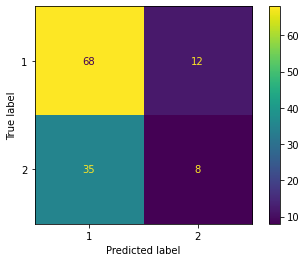

In [ ]:
cm1=confusion_matrix(y_test, SVM_pred)
print(confusion_matrix(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))
SVC(random_state=0)
plot_confusion_matrix(svclassifier, x_test, y_test)  # doctest: +SKIP
plt.show()

**Train**

Train Accuracy ::  0.6382113821138211
[[253  17]
 [161  61]]
              precision    recall  f1-score   support

           1       0.61      0.94      0.74       270
           2       0.78      0.27      0.41       222

    accuracy                           0.64       492
   macro avg       0.70      0.61      0.57       492
weighted avg       0.69      0.64      0.59       492



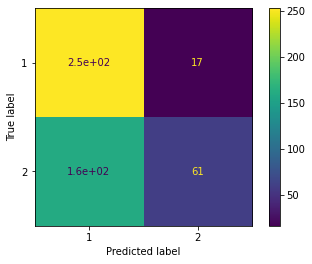

In [ ]:
#SVM Algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
SVM_pred = svclassifier.predict(x_train)
print("Train Accuracy :: ", accuracy_score(y_train,svclassifier.predict(x_train)))
#print("Test Accuracy  :: ", accuracy_score(y_test, SVM_pred))
cm1=confusion_matrix(y_train, SVM_pred)
print(confusion_matrix(y_train, SVM_pred))
print(classification_report(y_train, SVM_pred))
SVC(random_state=0)
plot_confusion_matrix(svclassifier, x_train, y_train)  # doctest: +SKIP
plt.show()

**K-Fold Method For SVM**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, x, y, cv=5)
cm1=confusion_matrix(y, y_pred)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.53658537 0.56910569 0.54471545 0.51219512 0.59349593]
Accuracy: 0.55 (+/- 0.06)
[[306  44]
 [232  33]]
              precision    recall  f1-score   support

           1       0.57      0.87      0.69       350
           2       0.43      0.12      0.19       265

    accuracy                           0.55       615
   macro avg       0.50      0.50      0.44       615
weighted avg       0.51      0.55      0.48       615



**Tarin-Test Method For Random Forest**

**Test**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)
Test Accuracy  ::  0.9349593495934959
[[75  5]
 [ 3 40]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95        80
           2       0.89      0.93      0.91        43

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.94      0.93      0.94       123



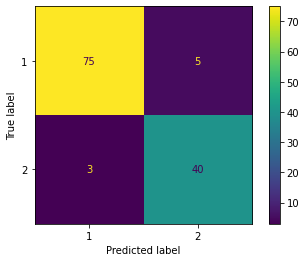

In [ ]:
#Random Forest Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2000, max_depth=500,random_state=47)
model=clf.fit(x_train, y_train)
print("Trained model :: ",model)
predictions =model.predict(x_test)
#print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
cm1=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
plt.show()

**Train**

Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)
Train Accuracy ::  1.0
[[270   0]
 [  0 222]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       222

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



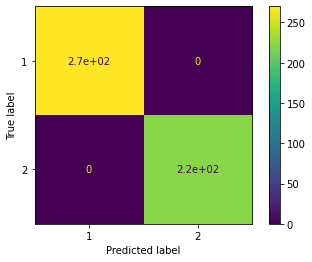

In [ ]:
#Random Forest Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2000, max_depth=500,random_state=47)
model=clf.fit(x_train, y_train)
print("Trained model :: ",model)
predictions =model.predict(x_train)
print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
#print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
cm1=confusion_matrix(y_train, predictions)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
plot_confusion_matrix(clf, x_train, y_train)  # doctest: +SKIP
plt.show()

**K-Fold Method For RFA**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =ensemble.forest.RandomForestClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, x, y, cv=5)
cm1=confusion_matrix(y, y_pred)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.72357724 0.87804878 0.82113821 0.92682927 0.71544715]
Accuracy: 0.81 (+/- 0.17)
[[319  31]
 [ 79 186]]
              precision    recall  f1-score   support

           1       0.80      0.91      0.85       350
           2       0.86      0.70      0.77       265

    accuracy                           0.82       615
   macro avg       0.83      0.81      0.81       615
weighted avg       0.83      0.82      0.82       615



**Train-Test Method For Ada-Boost**

**Test**

Trained model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=47)
Test Accuracy  ::  0.8699186991869918
[[66 14]
 [ 2 41]]
              precision    recall  f1-score   support

           1       0.97      0.82      0.89        80
           2       0.75      0.95      0.84        43

    accuracy                           0.87       123
   macro avg       0.86      0.89      0.86       123
weighted avg       0.89      0.87      0.87       123



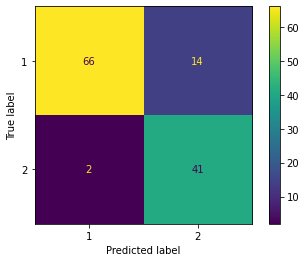

In [ ]:
#Ada-Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = AdaBoostClassifier(n_estimators=1000, random_state=47)
Model=clf.fit(x_train,y_train)
print("Trained model :: ",Model)
Ada_pred =Model.predict(x_test)
#print("Train Accuracy :: ", accuracy_score(y_train,Model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, Ada_pred))
cm1=confusion_matrix(y_test, Ada_pred)
print(confusion_matrix(y_test, Ada_pred))
print(classification_report(y_test, Ada_pred))
plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
plt.show()

**Train**

Trained model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=47)
Train Accuracy ::  1.0
[[270   0]
 [  0 222]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       222

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



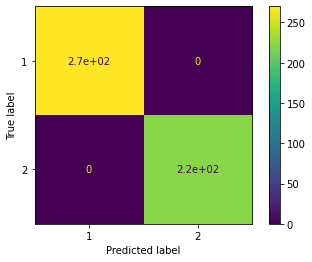

In [ ]:
#Ada-Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = AdaBoostClassifier(n_estimators=1000, random_state=47)
Model=clf.fit(x_train,y_train)
print("Trained model :: ",Model)
Ada_pred =Model.predict(x_train)
print("Train Accuracy :: ", accuracy_score(y_train,Model.predict(x_train)))
#print("Test Accuracy  :: ", accuracy_score(y_test, Ada_pred))
cm1=confusion_matrix(y_train, Ada_pred)
print(confusion_matrix(y_train, Ada_pred))
print(classification_report(y_train, Ada_pred))
plot_confusion_matrix(clf, x_train, y_train)  # doctest: +SKIP
plt.show()

**K-Fold Method For ABA**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =  ensemble.AdaBoostClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, x, y, cv=5)
cm1=confusion_matrix(y, y_pred)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.74796748 0.88617886 0.90243902 0.92682927 0.69918699]
Accuracy: 0.83 (+/- 0.18)
[[304  46]
 [ 57 208]]
              precision    recall  f1-score   support

           1       0.84      0.87      0.86       350
           2       0.82      0.78      0.80       265

    accuracy                           0.83       615
   macro avg       0.83      0.83      0.83       615
weighted avg       0.83      0.83      0.83       615



**Bar Chart For Classifier Using Train-Test Method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
algo = ['NB', 'DTA', 'SVM', 'RFA', 'ABA']
data = [[0.55,1.0,0.54,1.0,1.0],
[0.57,0.84,0.57,0.92,0.88],]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,0.7,0.7])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Train', 'Test'])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
ax.bar(algo, ax.bar)

**ROC Curve**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

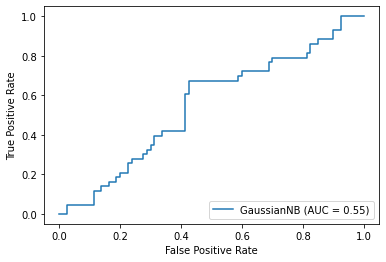

In [ ]:
nba = GaussianNB()
nba.fit(x_train, y_train)
nba_disp = plot_roc_curve(nba, x_test, y_test)
plt.show()

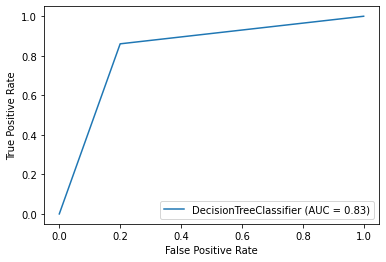

In [ ]:
dta = DecisionTreeClassifier(random_state=42)
dta.fit(x_train, y_train)
dta_disp = plot_roc_curve(dta, x_test, y_test)
plt.show()

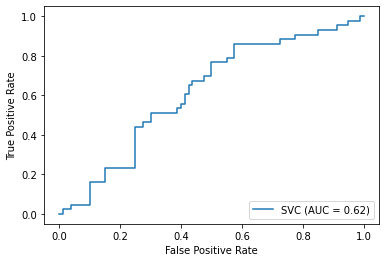

In [ ]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)
svc_disp = plot_roc_curve(svc, x_test, y_test)
plt.show()

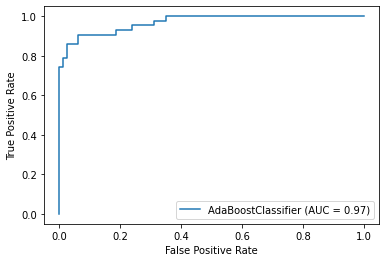

In [ ]:
aba = AdaBoostClassifier(random_state=42)
aba.fit(x_train, y_train)
aba_disp = plot_roc_curve(aba, x_test, y_test)
plt.show()

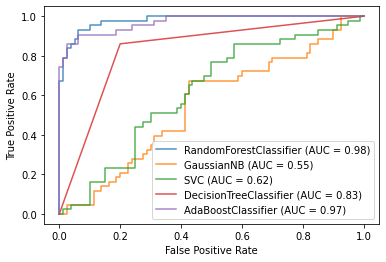

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, random_state=42)
rfc.fit(x_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=ax, alpha=0.8)

nba_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
dta_disp.plot(ax=ax, alpha=0.8)
aba_disp.plot(ax=ax, alpha=0.8)
plt.show()